In [2]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np
# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import chardet
with open("sales_data_sample.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [4]:
sales= pd.read_csv('sales_data_sample.csv',sep=',',encoding='Windows-1252')


In [5]:
print(sales.shape)

(2823, 25)


In [6]:
sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [10]:
# drop unwanted  features
sales = sales.drop(columns=["ORDERDATE","CITY","STATUS","POSTALCODE","STATE", "TERRITORY", "CONTACTLASTNAME", "CONTACTFIRSTNAME","CUSTOMERNAME", "PHONE", "ORDERNUMBER", "ADDRESSLINE1", "ADDRESSLINE2"])

In [11]:
sales.shape

(2823, 12)

In [12]:
sales.head()


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  COUNTRY          2823 non-null   object 
 11  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 264.8+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
sales['PRODUCTLINE'] = labelencoder.fit_transform(sales['PRODUCTLINE'])
sales['COUNTRY'] = labelencoder.fit_transform(sales['COUNTRY'])
sales['DEALSIZE'] = labelencoder.fit_transform(sales['DEALSIZE'])
sales['PRODUCTCODE'] = labelencoder.fit_transform(sales['PRODUCTCODE'])

sales.head(4)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1


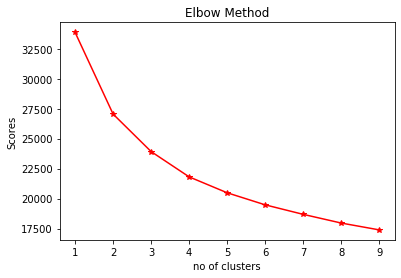

In [15]:
#Finding optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales)

scores_1 = []

range_of_cluster = range(1,10)

for i in range_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'r*-')
plt.xticks(np.arange(len(scores_1)), np.arange(1, len(scores_1) +1) )
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Scores')
plt.show()

In [16]:
# selected number of clusters as 5. (n = 5) based on the above graph

kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(scaled_data)

clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[sales.columns])
y_kmeans = kmeans.predict(scaled_data)

data_with_cluster = pd.concat([sales, pd.DataFrame({'CLUSTER': kmeans.labels_})], axis=1)
data_with_cluster.head(10)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,CLUSTER
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2,0
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2,0
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1,3
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1,3
4,49,100.00,14,5205.27,4,10,2003,1,95,0,18,1,3
5,36,96.66,1,3479.76,4,10,2003,1,95,0,18,1,3
6,29,86.13,9,2497.77,4,11,2003,1,95,0,6,2,1
7,48,100.00,1,5512.32,4,11,2003,1,95,0,11,1,3
8,22,98.57,2,2168.54,4,12,2003,1,95,0,18,2,1
9,41,100.00,14,4708.44,1,1,2004,1,95,0,6,1,4


In [17]:
print(clusters_centers)

  QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES    QTR_ID  MONTH_ID  \
0       -0.391395 -0.753072        0.031675 -0.798215 -1.061183 -1.061167   
1       -0.461002 -0.759795        0.062904 -0.818874  0.765340  0.766032   
2        0.533739  0.474855        0.043794  0.380095  0.666136  0.668925   
3       -0.043536  0.760669        0.029478  0.892243  0.606133  0.594468   
4        0.510427  0.625638       -0.183727  0.728114 -1.135879 -1.129422   

    YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE   COUNTRY  DEALSIZE  
0  0.479408    0.163071 -0.627027    0.356201 -0.154680  0.937918  
1 -0.376961    0.157342 -0.668098    0.351370  0.039138  1.015353  
2 -0.372183    0.374241 -0.100782    0.359851  0.123357 -0.700903  
3 -0.456453   -0.747324  1.335516   -1.048285 -0.009212 -0.865028  
4  0.783669   -0.091091  0.447794   -0.264567 -0.011013 -0.833779  


In [18]:
#pip install plotly

In [19]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [21]:
#Dimension Reduce
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_comp, columns=['pca_1', 'pca_2', 'pca_3'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

#Showing
import plotly
import plotly.express as px
#fig = px.scatter_3d(pca_df, x='pca_1', y='pca_2', z= 'pca_3',color='cluster', symbol='cluster', size_max=20, opacity=0.6)
#fig.show()

fig = px.scatter(pca_df, x='pca_1', y='pca_2',color ='cluster',symbol='cluster')
fig.show()